In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from collections import Counter
from skimage import io, morphology

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GRIG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Test

Read a burger image and find its size.

783126


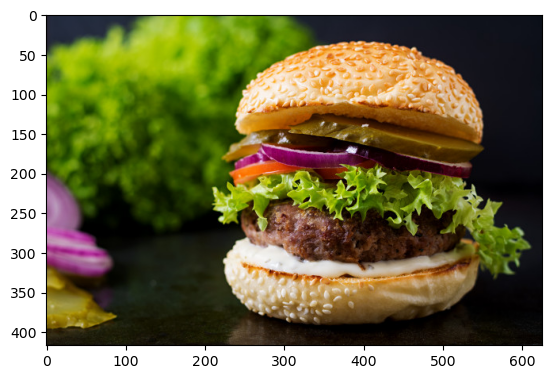

In [13]:
img = io.imread('burger.jpg')
print(img.nbytes)
plt.imshow(img)
plt.show()

An indication of the dominant color of the image can be the dominant channel, i.e. the channel (R, G, or B) with the greatest average brightness (intensity). What is the mean brightness of the dominant channel in the hamburger image? Round your answer to two decimal places.

In [15]:
channel_means = np.mean(img, axis=(0, 1))

In [17]:
print(channel_means)

[90.08790156 84.07082002 36.79257744]


In [18]:
dominant_channel_mean_brightness = round(channel_means[0],2)
print(dominant_channel_mean_brightness)

90.09


Read the blue channel of the hamburger image. Perform binary opening on this channel using a 3x3 square as the structuring element. How many white pixels does the resulting image contain?

In [21]:
blue_channel = img[:, :, 2]

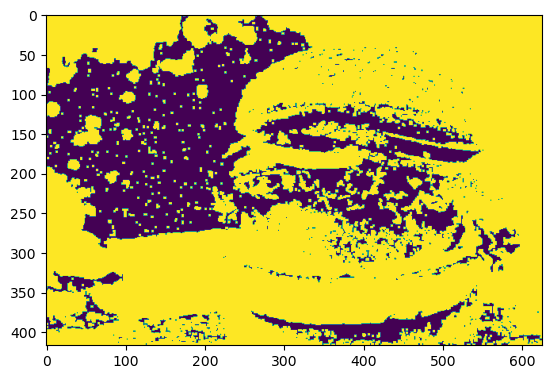

In [25]:
opened_image = morphology.binary_opening(blue_channel, morphology.square(3))
plt.imshow(opened_image)
plt.show()

In [23]:
white_pixel_count = np.sum(opened_image)

In [24]:
print(white_pixel_count)

182990


The most popular text in Project Gutenberg is the book "Pride and Prejudice" by Jane Austen, located at http://www.gutenberg.org/files/1342/1342-0.txt. Split by non-word characters to get all words. How many times does the word "pride" occur in the entire Web page? Don't forget to account for different casing.

In [41]:
url = 'http://www.gutenberg.org/files/1342/1342-0.txt'
response = requests.get(url)
text = response.text

word_counter = Counter(re.split("\W+", text.lower()))

print(word_counter["pride"])

59


How many times does the word "prejudice" occur in the entire Web page?

In [42]:
print(word_counter["prejudice"])

14


Remove all stopwords. Once again, count all remaining words. What's the name of the protagonist (main character) in the book?

In [53]:
words = re.split("\W+", text.lower())
words_filtered = [word for word in words if word.lower() not in stop]

filtered_word_counts = Counter(words_filtered)
print(filtered_word_counts.most_common(5))

[('â', 3732), ('mr', 807), ('elizabeth', 605), ('could', 531), ('would', 482)]
